**Mathematical Foundations for Computer Vision and Machine Learning**

*** Assignment03 - k-means algorithm ***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment03)

# Setting up

By changing variable numOfClusters, you can see that "k" in **k-means** changes.

Variable ```label``` is used to store the label of nth point.

Variable ```centroid``` stores the coordinates of centroids of each clusters.

Variable ```listOfDist``` stores the distance (second-order) from one point to all centroids.

Variable ```E``` stores the energy of each loop

The **maximum k** is **6** since there's not enough color. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Conditions
numOfClusters = 6
dim = 2
numOfPoints = 500
coordRange = 500
coord = np.random.random((numOfPoints, dim))
avg = np.zeros(dim)
label = []  #n번째 원소 = n번째 점의 label
color_list = ['b.', 'g.', 'r.', 'c.', 'm.', 'y.']
color_list_cen = ['b*', 'g*', 'r*', 'c*', 'm*', 'y*']
centroid = np.zeros((numOfClusters))
listOfDist = np.zeros((numOfClusters,numOfPoints))
E = [] # 매 루프


# Define Essential Functions

I define some funtions that is essential to implement k-means algorithm.

```generatePointCluster``` makes ```coord``` de-meaned.

```initializeLabel``` initializes the whole points' label.

```computeDistance``` computes the matrix ```listOfDist```

```assignLabel``` assigns the whole points to the most close centroid.

```computeCentroid``` computes the coordinate of each centroids using ```label``` and ```coord``` to find the mean.

```computeEnergy``` computes energy of each step and record it to list ```E```


In [2]:
# Functions
def generatePointCluster(numOfClusters, numOfPoints, coordRange):
    for i in range(dim):
        avg = coord.sum(axis=0)/numOfPoints
        coord[:,i] = (coord[:,i] - avg[i]) * coordRange


In [3]:
def initializeLabel(numOfClusters):
    return np.random.randint(numOfClusters,size=numOfPoints)


In [4]:
def computeDistance():
    # second-order
    for c in range(numOfClusters):
        for i in range(numOfPoints):
            listOfDist[c][i] = sum((centroid[c] - coord[i])**2)


In [5]:
def assignLabel():
    for i in range(numOfPoints):
        label[i] = np.argmin(listOfDist[:,i])


In [6]:
def computeCentroid():
    num = np.zeros((numOfClusters))
    c = np.zeros((numOfClusters, dim))

    for i in range(numOfPoints):
        num[label[i]] += 1
        c[label[i]] += coord[i]

    for i in range(numOfClusters):
        c[i] /= num[i]
    return c


In [7]:
def computeEnergy(): #must decrease
    energy = 0
    for i in range(numOfPoints):
        energy += sum((centroid[label[i]] - coord[i])**2)
    energy /= numOfPoints
    return energy


# Input Data

To begin with, you should create a sample points. We can call this **input data**.

$$\tilde{x} = (x - \bar{x})*range$$

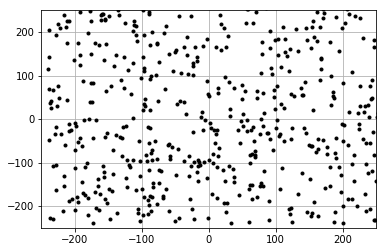

In [8]:
# Test Code
generatePointCluster(numOfClusters=numOfClusters, numOfPoints=numOfPoints, coordRange=coordRange)
plt.figure(1)
plt.plot(coord[:,0],coord[:,1],"k.")
plt.xlim(-coordRange/2,coordRange/2)
plt.ylim(-coordRange/2,coordRange/2)
plt.grid(True)
plt.show()

# Initial Label

By using ```label = initializeLabel(numOfClusters=numOfClusters)``` the initial labels are set.

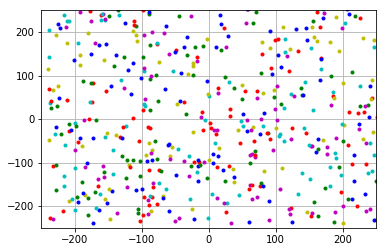

In [9]:
label = initializeLabel(numOfClusters=numOfClusters)
plt.figure(2)
for i in range(numOfPoints):
    plt.plot(coord[i][0],coord[i][1],color_list[label[i]])
plt.xlim(-coordRange/2,coordRange/2)
plt.ylim(-coordRange/2,coordRange/2)
plt.grid(True)
plt.show()

# Initial Centroid

$$ c_i = \frac{1}{N}\Sigma{x_k}   $$ where $$l(x_k) == i$$

Now let's check the initial centorid of the input data. Seems like uniformly distributed.

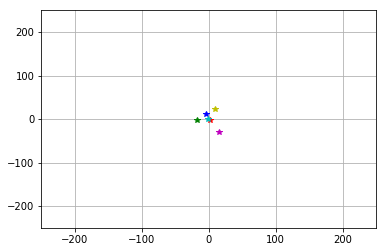

In [10]:
iter_num = 0
centroid = computeCentroid()
E.append(computeEnergy())
iter_num += 1

plt.figure(3)
for c in range(numOfClusters):
    plt.plot(centroid[c][0], centroid[c][1], color_list_cen[c])
plt.xlim(-coordRange/2,coordRange/2)
plt.ylim(-coordRange/2,coordRange/2)
plt.grid(True)
plt.show()


# Final label

After k-means algorithm, the data are clustered into 'k' clusters. Data are label to several colors and centroids are shown as star.

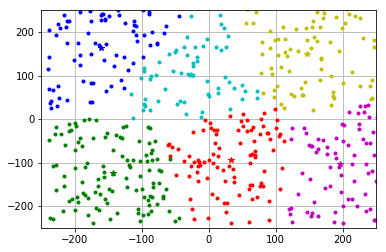

In [11]:
while True:
    computeDistance()
    assignLabel()
    centroid = computeCentroid()
    E.append(computeEnergy())
    if E[-1] == E[-2]:
        break
    iter_num += 1


plt.figure(4)
for i in range(numOfPoints):
    plt.plot(coord[i][0], coord[i][1], color_list[label[i]])
for c in range(numOfClusters):
    plt.plot(centroid[c][0], centroid[c][1], color_list_cen[c])
plt.xlim(-coordRange/2,coordRange/2)
plt.ylim(-coordRange/2,coordRange/2)
plt.grid(True)
plt.show()


# Energy per each iteration

$$ E = \frac{1}{N}\Sigma{\|x_i - c_k\|^2} $$

Let's see if energy decreased monotonically. It seems my program works fine.

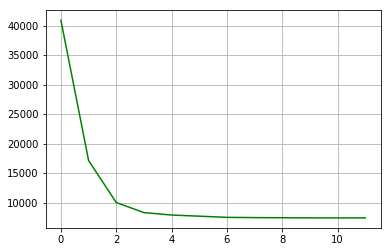

In [12]:
plt.figure(5)
x_range = np.arange(iter_num+1)
plt.plot(x_range,E,"g")
plt.grid(True)
plt.show()